# Finding the Best Neighborhood in Pittsburgh

Brian Kim

In [15]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
traffic = pd.read_csv('traffic_data.csv')

In [17]:
traffic.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7,6,42003060500,6,6,2,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7,9,42003090200,2,9,2,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2,28,42003563000,5,28,6,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5,14,42003140800,3,14,4,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1,26,42003260200,1,26,1,1-15


In [18]:
#organize the dataframe to show speeding rates by neighborhood
by_neighborhood = pd.pivot_table(traffic,values='percent_over_limit',index='neighborhood')
by_neighborhood

,percent_over_limit
neighborhood,
Allegheny Center,65.000000
Allegheny West,11.000000
Arlington,61.500000
Beechview,59.000000
Bloomfield,26.500000
Bluff,14.666667
Brookline,41.000000
Carrick,13.000000
Central Business District,6.000000


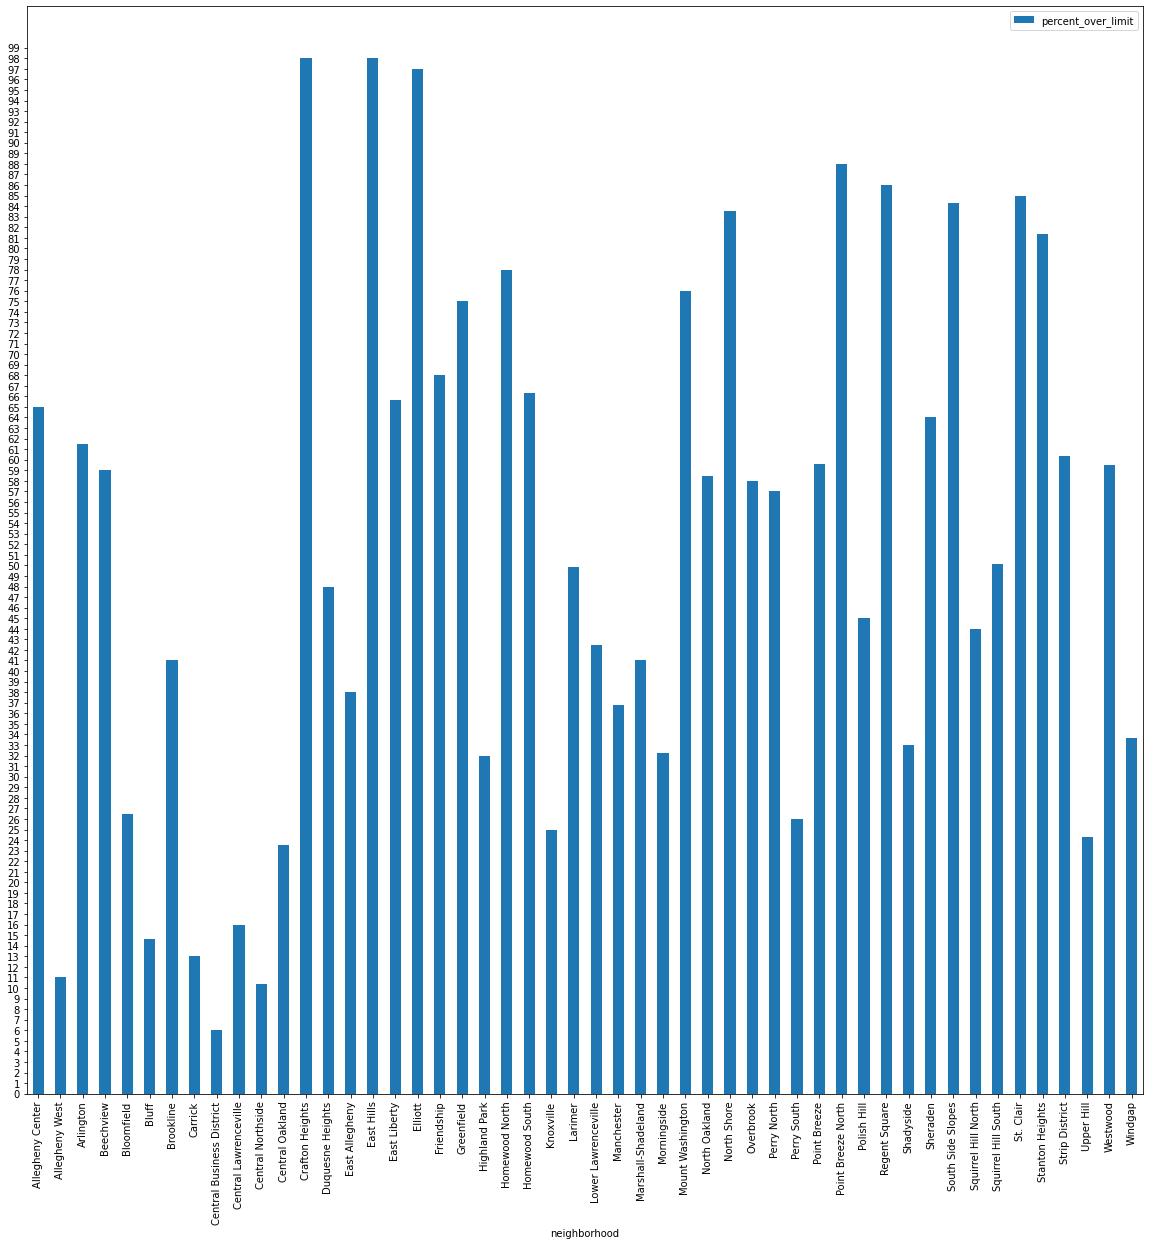

In [19]:
#plot data
by_neighborhood.plot.bar(figsize=(20,20), yticks=([i for i in range(0, 100)]))
plt.show()

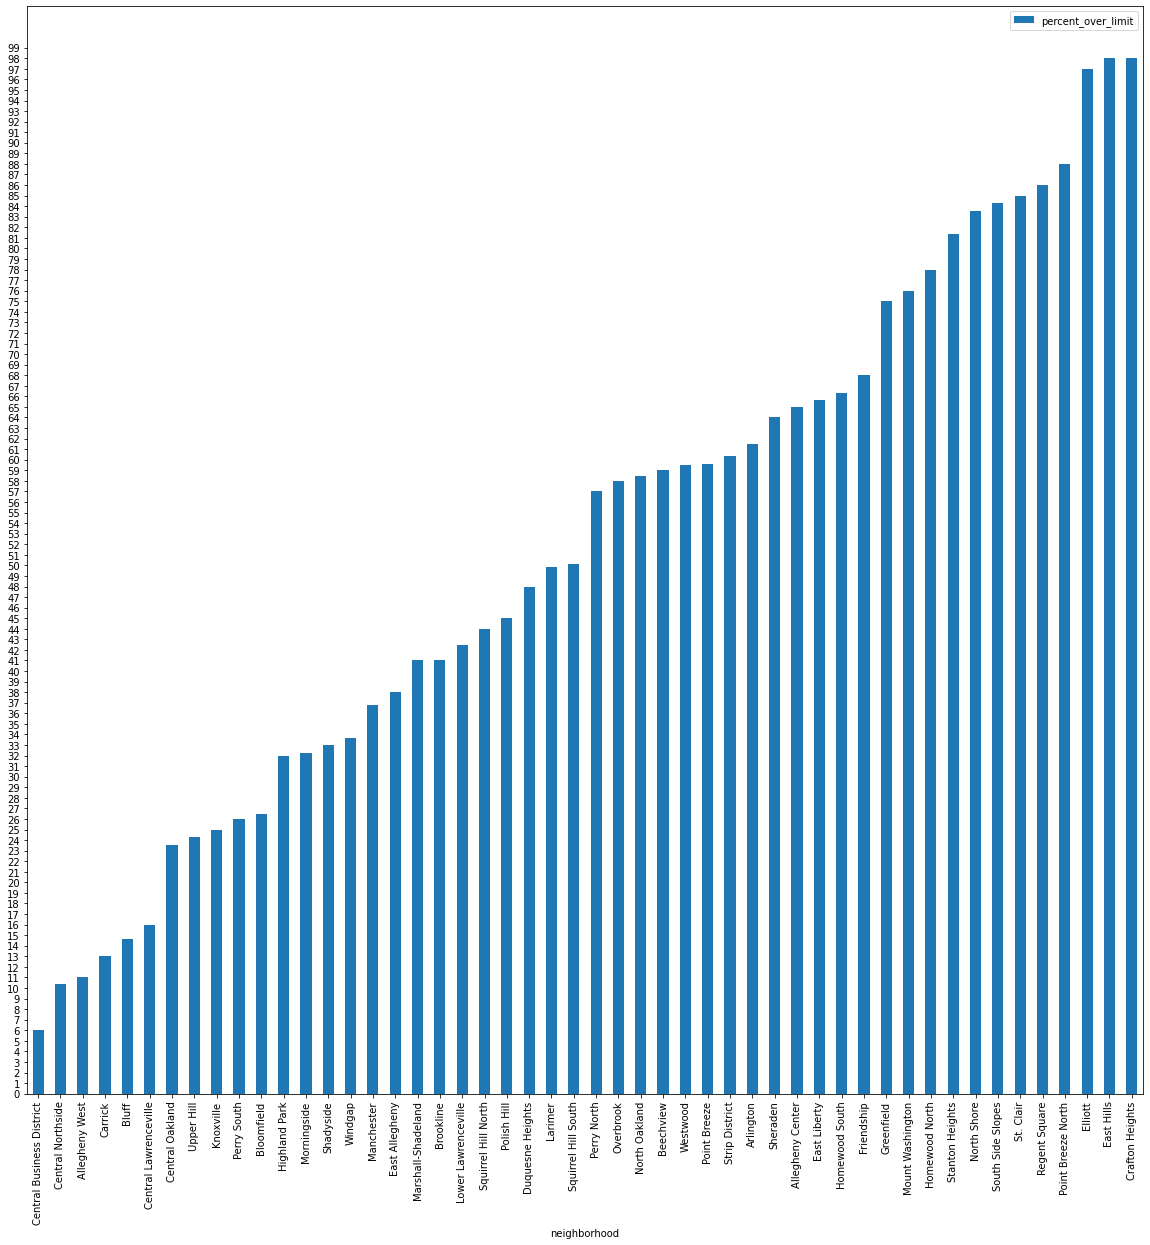

In [20]:
#sort the data to get a clearer picture
by_neighborhood.sort_values(by=['percent_over_limit'], inplace=True)
by_neighborhood.plot.bar(figsize=(20,20), yticks=([i for i in range(0, 100)]))
plt.show()

In [23]:
#find the neighborhood with the smallest speeding rate
by_neighborhood.loc[by_neighborhood['percent_over_limit'] == int(by_neighborhood['percent_over_limit'].min())]

,percent_over_limit
neighborhood,
Central Business District,6.0


**ANALYSIS**

Central Business District has shown to be the safest neighborhood when looking at how many vehicles speed over the limit. Elliot, East Hills, and Crafton Heights are by far the worst with over 97 percent speeding over the limit.

*But Central District has the highest number of arrests*
Eventually, we'll have to find out a way to compare this data set with the number of arrests data set and ultimately make a final veredict.